In [1]:
# Fist install the library and download the models from github
# !pip install transformers
!pip install transformers
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz 
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt 
# !wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/config.json 
# !tar -xzvf pytorch_weights.tar.gz
# !mv config.json pytorch/.
# !mv vocab.txt pytorch/.

     |████████████████████████████████| 3.8 MB 4.0 MB/s 
     |████████████████████████████████| 6.5 MB 48.5 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 596 kB 51.4 MB/s 
     |████████████████████████████████| 895 kB 55.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import warnings
warnings.simplefilter('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: hindi-vocab.txt         


In [ ]:

!mkdir pytorch

In [ ]:
!cp /content/drive/MyDrive/pytorch_model.bin /content/pytorch

In [ ]:
!cp /content/drive/MyDrive/ftb5/config.json /content/pytorch

In [132]:
with open("/content/drive/MyDrive/dataa/HOT.txt","r")as a:
	texts = a.readlines()

In [133]:
# with open("/content/drive/MyDrive/dataa/Trac2_test.txt","r")as a:
# 	texts_test = a.readlines()

In [134]:
import pickle


In [135]:
with open('/content/drive/MyDrive/dataa/HOT_Labels.pkl', 'rb') as f:
  Labels = pickle.load(f)

In [136]:
# Labels

In [137]:
# with open('/content/drive/MyDrive/dataa/Trac2_test_Labels.pkl', 'rb') as f:
#   Labels_test = pickle.load(f)

In [138]:
# Labels_test

In [139]:
import pandas as pd

In [140]:
train = pd.DataFrame(zip(texts,Labels),columns=['Text','Label'])

In [141]:
# testt = pd.DataFrame(zip(texts_test,Labels_test),columns=['Text','Label'])

In [142]:
# max_size =train["Label"].value_counts().max()


# lst = [train]
# for class_index, group in train.groupby('Label'):
#     lst.append(group.sample(max_size-len(group), replace=True))
# train_new = pd.concat(lst)

In [143]:
# import pandas as pd
# train = pd.read_csv("/content/augmented_trac2.csv")
# # testt = pd.read_excel("/content/test.xlsx")

In [144]:
train.head()

,Text,Label
0,haa jaise tum bhi abhi\n,0
1,"banti hai empowered woman, feminism pe gyan pe...",2
2,rt ab usko chhod mjse bat kr tera baap aa gya ...,2
3,"punjab in madarchodon ko khila raha hai, nokri...",2
4,rt agar koi bole ki ja ke chill maar to madarc...,2


In [145]:
train.columns=['Text','Label']

In [146]:
from transformers import (
   AutoConfig,
   AutoTokenizer,
   TFAutoModelForSequenceClassification,
   AdamW,
   glue_convert_examples_to_features
)
import tensorflow as tf
import tensorflow_datasets as tfds
import json

In [147]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
# RANDOM_SEED = 42
# np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [148]:
 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5976233977395640172
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13190823936
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16922287455854715199
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [20]:
!pip3 install sentencepiece


     |████████████████████████████████| 1.2 MB 3.9 MB/s 


In [149]:
from transformers import AutoModel, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('ai4bharat/indic-bert')
model = AutoModel.from_pretrained('ai4bharat/indic-bert')


Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [150]:
# from transformers import BertModel
# model = Auto.from_pretrained('/content/pytorch')

In [151]:
train.dropna(inplace=True)

In [152]:
train['Text'] = train['Text'].apply(lambda x:x.replace('\n',''))

In [153]:
# train_new.dropna(inplace=True)
# train_new['Text'] = train_new['Text'].apply(lambda x:x.replace('\n',''))

In [154]:
train.shape

(3189, 2)

In [155]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train['Label'] = labelencoder.fit_transform(train['Label'])

In [156]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# train_new['Label'] = labelencoder.fit_transform(train_new['Label'])

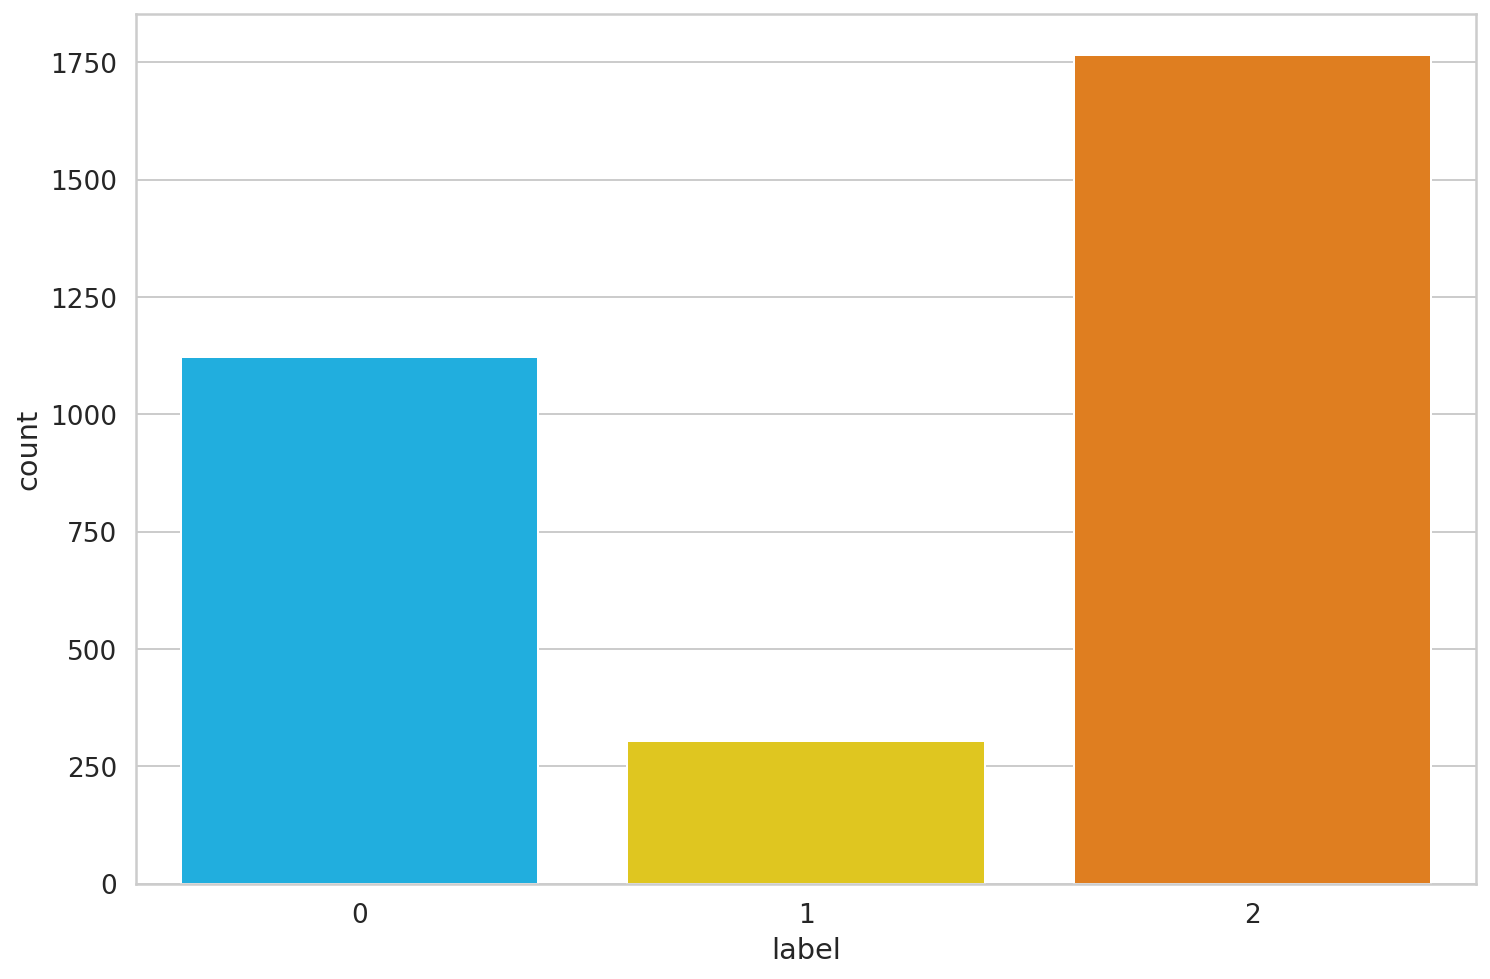

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train.Label)
plt.xlabel('label');

In [158]:
# model_name = '/content/pytorch/hindi-vocab.txt'
# tokenizer = BertTokenizer.from_pretrained(model_name, truncation=True)

In [159]:
import tokenizers

In [160]:
sample_txt = 'Yeh ek vkya hai'

In [161]:
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: Yeh ek vkya hai
   Tokens: ['▁ye', 'h', '▁', 'ek', '▁v', 'kya', '▁hai']
Token IDs: [121067, 3343, 8, 19216, 10048, 107553, 31279]


In [162]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 3)

In [163]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=90,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['input_ids', 'attention_mask'])

In [164]:
token_lens = []

for txt in train.Text:
  tokens = tokenizer.encode(txt,truncation=True, max_length=512)
  token_lens.append(len(tokens))

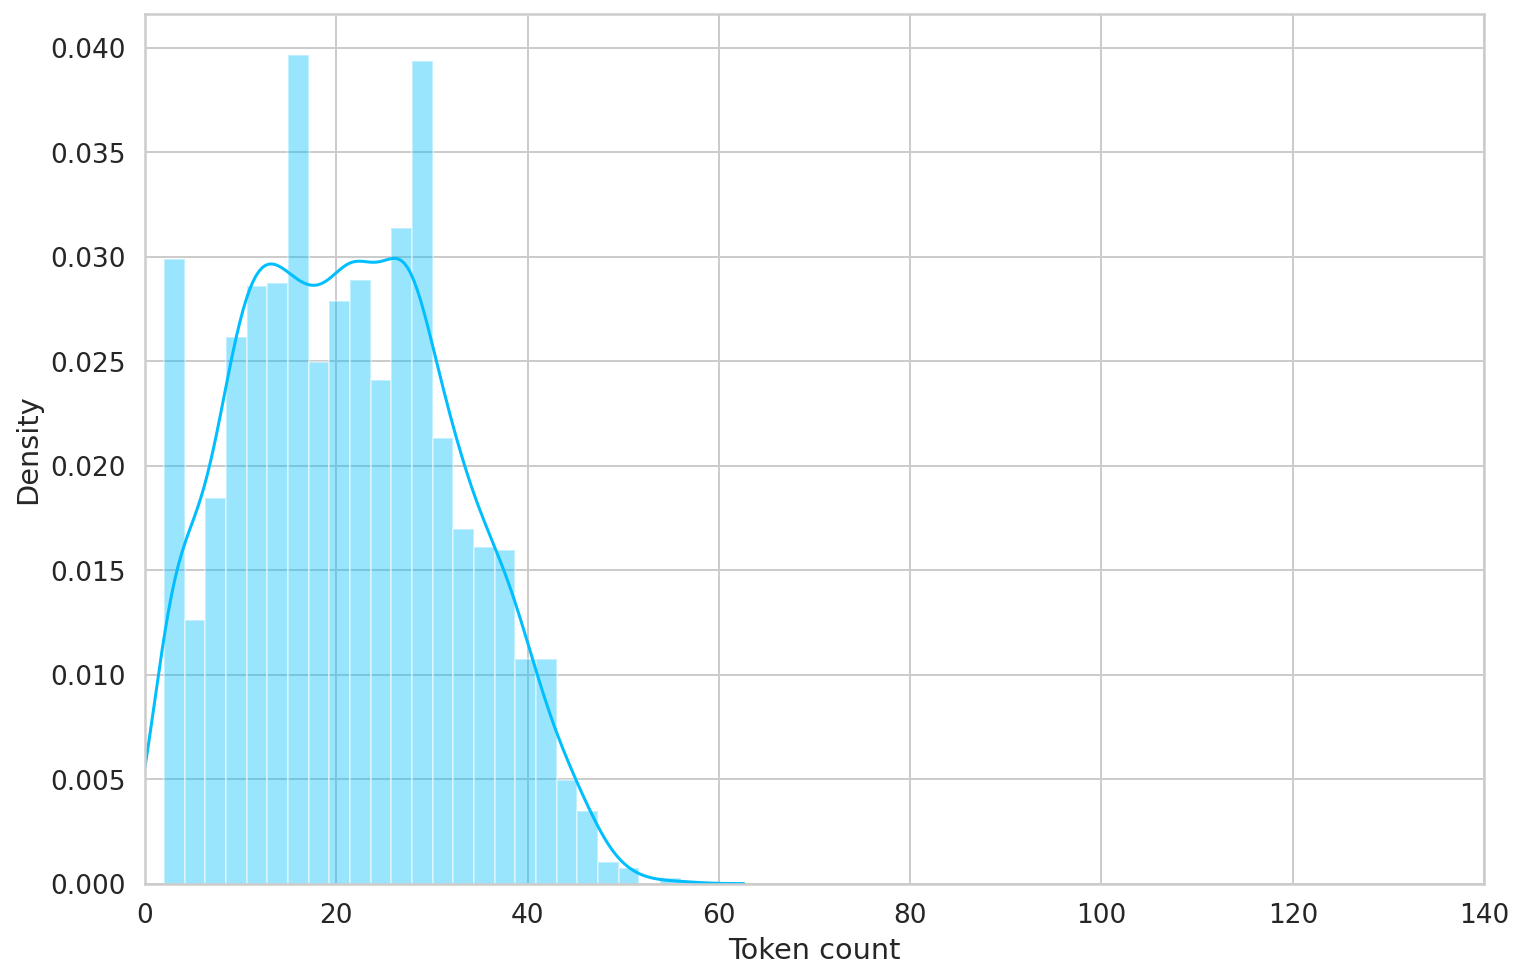

In [165]:
sns.distplot(token_lens)
plt.xlim([0, 140]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 72

In [36]:
MAX_LEN = 64

In [166]:
MAX_LEN = 36

In [107]:
MAX_LEN = 54

In [167]:
class GPReviewDataset(Dataset):
  def __init__(self, Text, Label, tokenizer, max_len):
    self.Text = Text
    self.Label = Label
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.Text)
  def __getitem__(self, item):
    Text = str(self.Text[item])
    Label = self.Label[item]
    encoding = self.tokenizer.encode_plus(
      Text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      truncation=True,
      return_tensors='pt',
    )
    return {
      'text': Text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'Label': torch.tensor(Label, dtype=torch.long)
    }

In [168]:
# df_train, df_val = train_test_split(
#   train_new,
#   test_size=0.001,
#   stratify = train_new.Label.values,
#   random_state=42
# )
# # df_val, df_test = train_test_split(
# #   df_test,
# #   test_size=0.08,
# #   stratify = df_test.Label.values,
# #   random_state=42
# # )
# df_train.shape, df_val.shape

In [169]:
df_train, df_val = train_test_split(
  train,
  test_size=0.20,
  stratify = train.Label.values,
  random_state=42
)
df_val, df_test = train_test_split(
  df_val,
  test_size=0.50,
  stratify = df_val.Label.values,
  random_state=42
)


df_train.shape, df_val.shape

((2551, 2), (319, 2))

In [170]:

# df_train.to_csv("df_train_0.02.csv")
# df_val.to_csv("df_val_0.02.csv") 
# df_test.to_csv("df_test_0.02.csv")

In [171]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(
    Text=df.Text.to_numpy(),
    Label=df.Label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )

In [172]:
BATCH_SIZE = 64
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
# test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [173]:


# data = next(iter(train_data_loader))
# data.keys()

In [174]:
# data = next(iter(train_data_loader))
# data.keys()
# print(data['input_ids'].shape)
# print(data['attention_mask'].shape)
# print(data['Label'].shape)

In [175]:
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('ai4bharat/indic-bert')
    
    self.drop = nn.Dropout(p=0.33)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False)
    output = self.drop(pooled_output)
    return self.out(output)

In [176]:
import gc

In [177]:
# bert = BertModel.from_pretrained('/content/pytorch')
# conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
# relu = nn.ReLU()
# pool = nn.MaxPool2d(kernel_size=3, stride=1)
# dropout = nn.Dropout(0.1)
# fc = nn.Linear(676, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
# flat = nn.Flatten()
# softmax = nn.LogSoftmax(dim=1)

In [178]:
# input_ids = data['input_ids']

# attention_mask = data['attention_mask']

# _,_,output = bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)

# x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in output]), 0), 0, 1)


# x = dropout(x)

# x = conv(x)


# # x= pool(x)


# flat = nn.Flatten()

# flat(x).size()

In [179]:
# class BERT_Arch(nn.Module):

#     def __init__(self, bert):
#         super(BERT_Arch, self).__init__()
#         self.bert = BertModel.from_pretrained('/content/pytorch')
#         self.conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=3, stride=1)
#         self.dropout = nn.Dropout(0.20)
#         self.fc = nn.Linear(442, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
#         self.flat = nn.Flatten()
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         _,_, all_layers = self.bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)
#         # all_layers  = [13, 32, 64, 768]
#         x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in all_layers]), 0), 0, 1)
#         del all_layers
#         gc.collect()
#         torch.cuda.empty_cache()
#         x = self.pool(self.dropout(self.relu(self.conv(self.dropout(x)))))
#         x = self.fc(self.dropout(self.flat(self.dropout(x))))
#         return self.softmax(x)

In [180]:
# class BERT_Arch(nn.Module):

#     def __init__(self, bert):
#         super(BERT_Arch, self).__init__()
#         self.bert = BertModel.from_pretrained('/content/pytorch')
#         self.conv = nn.Conv2d(in_channels=13, out_channels=13, kernel_size=(3, 768), padding=True)
#         self.relu = nn.ReLU()
#         self.pool = nn.MaxPool2d(kernel_size=3, stride=1)
#         self.dropout = nn.Dropout(0.15)
#         self.fc = nn.Linear(2496, 3) # before : 442 with max_length 36 # 806 with max_length 64 1534 for 120 676 for 54
#         self.flat = nn.Flatten()
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask):
#         _,_, all_layers = self.bert(input_ids = input_ids, attention_mask=attention_mask, output_hidden_states=True)
#         # all_layers  = [13, 32, 64, 768]
#         x = torch.transpose(torch.cat(tuple([t.unsqueeze(0) for t in all_layers]), 0), 0, 1)
#         del all_layers
#         gc.collect()
#         torch.cuda.empty_cache()
#         x = self.dropout(self.relu(self.conv(self.dropout(x))))
#         x = self.fc(self.dropout(self.flat(self.dropout(x))))
#         return self.softmax(x)

In [181]:
n_classes = 3
class_names = ['0','1','2']

In [182]:

modell = SentimentClassifier(len(class_names))
modell = modell.to(device)

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['sop_classifier.classifier.bias', 'sop_classifier.classifier.weight', 'predictions.dense.bias', 'predictions.decoder.weight', 'predictions.LayerNorm.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.bias', 'predictions.bias', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [183]:


import math

In [184]:
EPOCHS = 3
optimizer = AdamW(modell.parameters(), lr=2e-5, correct_bias=True)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

In [185]:
loss_fn = nn.CrossEntropyLoss().to(device)

In [186]:

def train_epoch(
  modell,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples):
  modell = modell.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    Label = d["Label"].to(device)
    outputs = modell(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, Label)
    correct_predictions += torch.sum(preds == Label)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(modell.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [187]:
def eval_model(modell, data_loader, loss_fn, device, n_examples):
  modell = modell.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      Label = d["Label"].to(device)
      outputs = modell(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, Label)
      correct_predictions += torch.sum(preds == Label)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [188]:

%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    modell,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    modell,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(modell.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/3
----------
Train loss 0.9782695859670639 accuracy 0.5507644061152489
Val   loss 0.8540573954582215 accuracy 0.5517241379310345

Epoch 2/3
----------
Train loss 0.8225342810153962 accuracy 0.5542924343394747
Val   loss 0.7909026384353638 accuracy 0.5517241379310345

Epoch 3/3
----------
Train loss 0.7607745304703712 accuracy 0.5566444531556253
Val   loss 0.7492457032203674 accuracy 0.5517241379310345

CPU times: user 39.6 s, sys: 3.46 s, total: 43.1 s
Wall time: 44.8 s


In [62]:
# !cp /content/best_model_state.bin /content/drive/MyDrive/fihindibert

In [63]:
# !mkdir /content/drive/MyDrive/ftb5

In [64]:
# modell.bert.save_pretrained("/content/drive/MyDrive/ftb5")

In [65]:
# modell.save(modell, '/content/drive/MyDrive/fihindibert/model.bin')

In [189]:
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [190]:
test_acc, _ = eval_model(
  modell,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

0.554858934169279

In [60]:
actual_test_data_loader = create_data_loader(testt, tokenizer, MAX_LEN, BATCH_SIZE)

In [61]:
actual_test_acc, _ = eval_model(
  modell,
  actual_test_data_loader,
  loss_fn,
  device,
  len(testt)
)
actual_test_acc.item()

0.27083333333333337

In [191]:
def get_predictions(modell, data_loader):
  modell = modell.eval()
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      text = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      Label = d["Label"].to(device)
      outputs = modell(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      text.extend(text)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(Label)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return text, predictions, prediction_probs, real_values

In [192]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  modell,
  test_data_loader
)

In [67]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  modell,
  actual_test_data_loader
)

# **TRAC2**

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.27      1.00      0.43       325
           2       0.00      0.00      0.00       684

    accuracy                           0.27      1200
   macro avg       0.09      0.33      0.14      1200
weighted avg       0.07      0.27      0.12      1200



# **Hate Speech**

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       291
           1       0.00      0.00      0.00       166

    accuracy                           0.64       457
   macro avg       0.32      0.50      0.39       457
weighted avg       0.41      0.64      0.50       457



# **HOT**

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00        30
           2       0.55      1.00      0.71       177

    accuracy                           0.55       319
   macro avg       0.18      0.33      0.24       319
weighted avg       0.31      0.55      0.40       319

